In [41]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# gffcompare

In [45]:
def print_heatmap(matrix, metric):

    g = sns.clustermap(matrix,
                   annot=True,
                   fmt=".1f",
                   annot_kws={"size": 18}
                   )

    g.ax_heatmap.tick_params(labelsize=18)
    g.ax_heatmap.set_title(metric, size = 28, y = 1.3)
#     g.savefig(f"{metric}.png") 


In [37]:
def remove_name(column, s):   
    return column.replace(s, "")

In [6]:
species_dict = {
    'al': 'Arabidopsis_lyrata',
    'dm': 'Drosophila_melanogaster',
    'cc': 'Citrullus_colocynthis',
    'hh': 'Helleia_helle',
    'lm': 'Leishmania_major',
    'hs': 'Homo_sapiens'
}

In [48]:
a = ! ls ../out/*/*level*

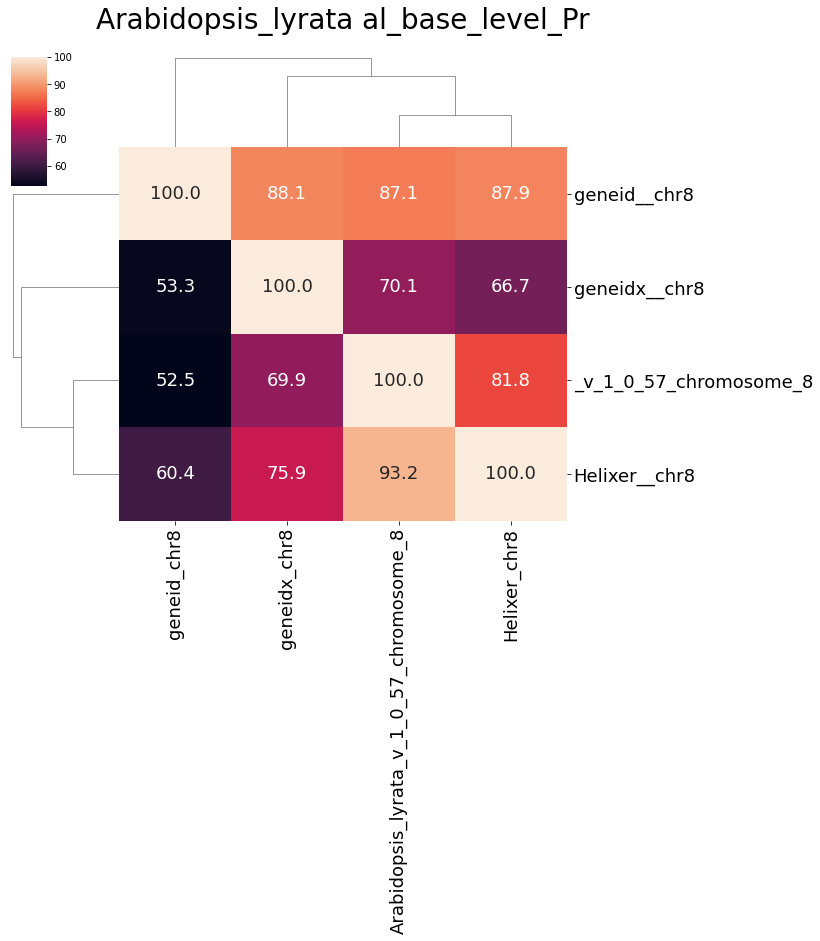

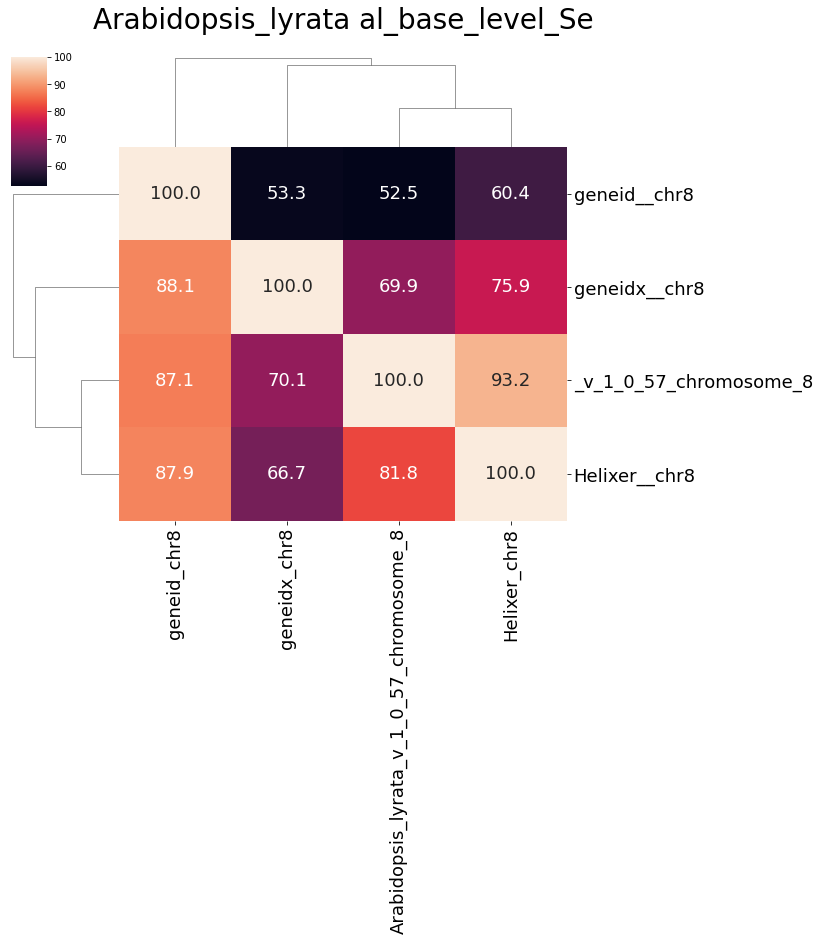

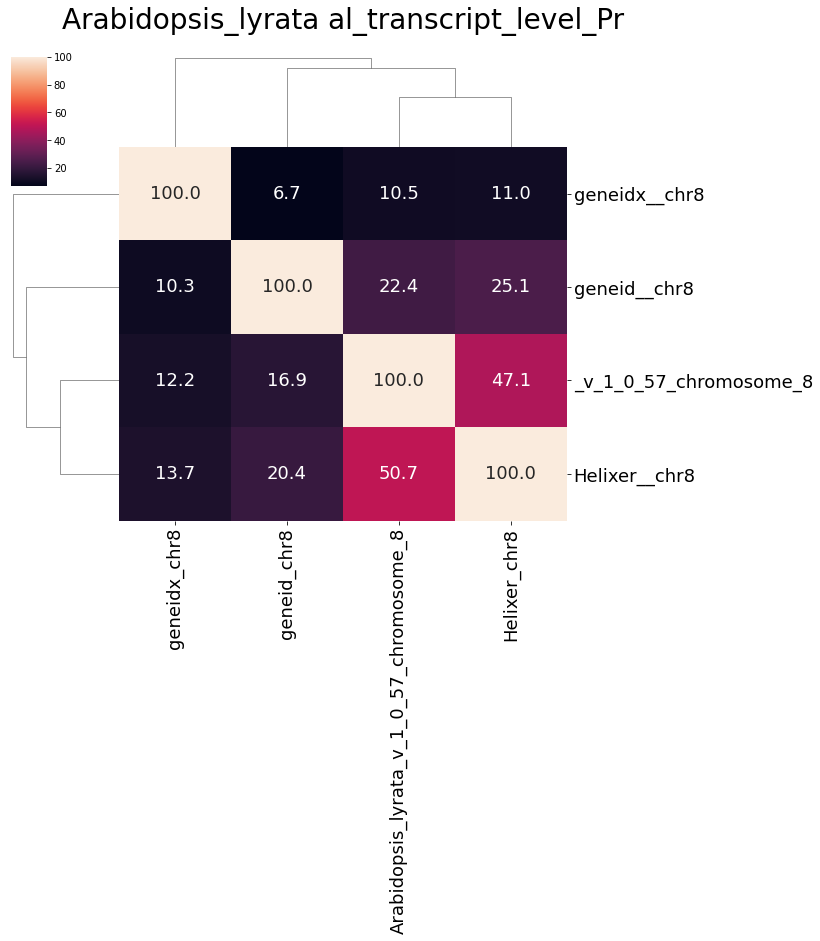

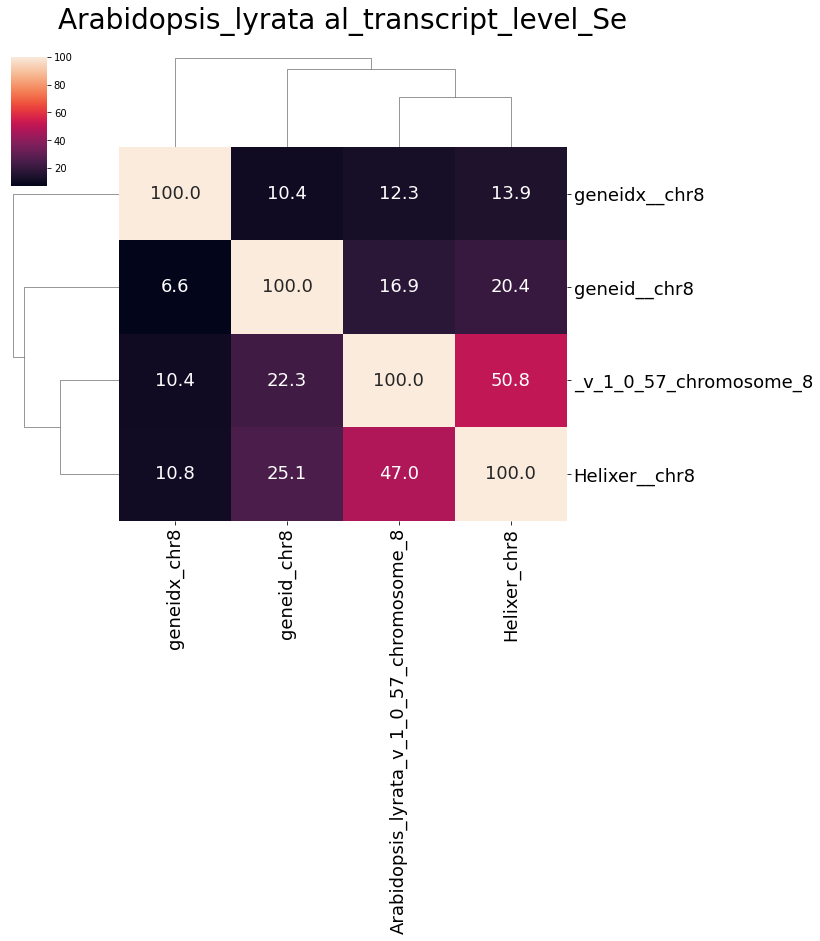

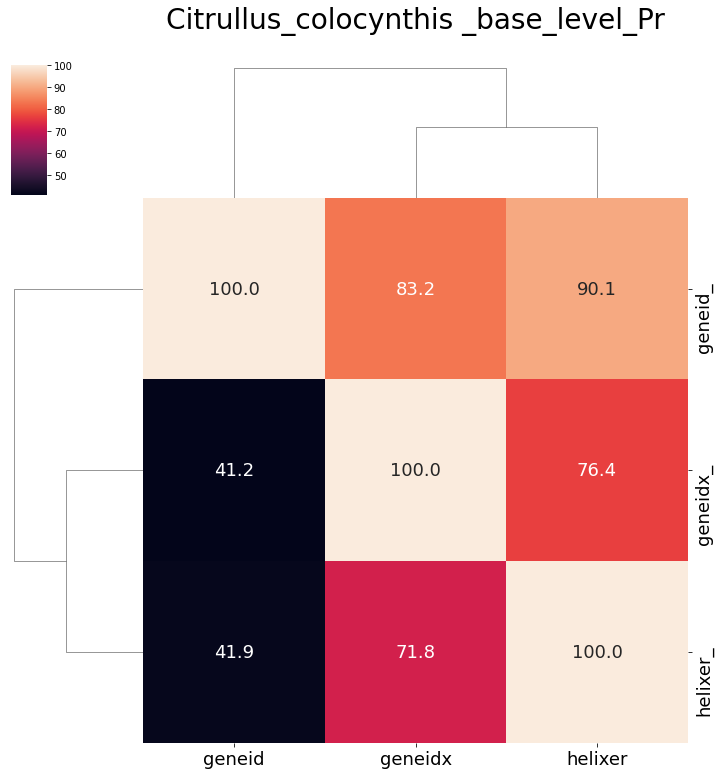

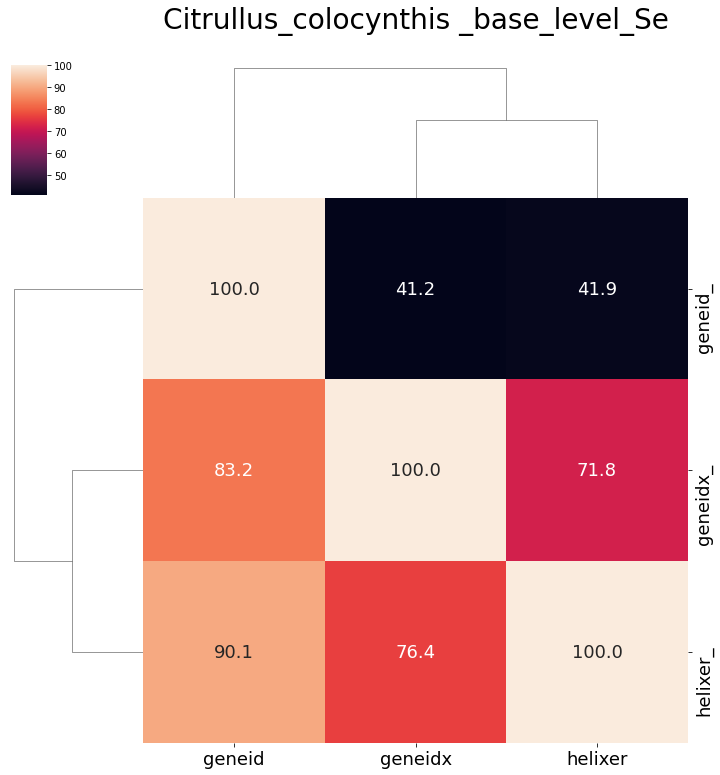

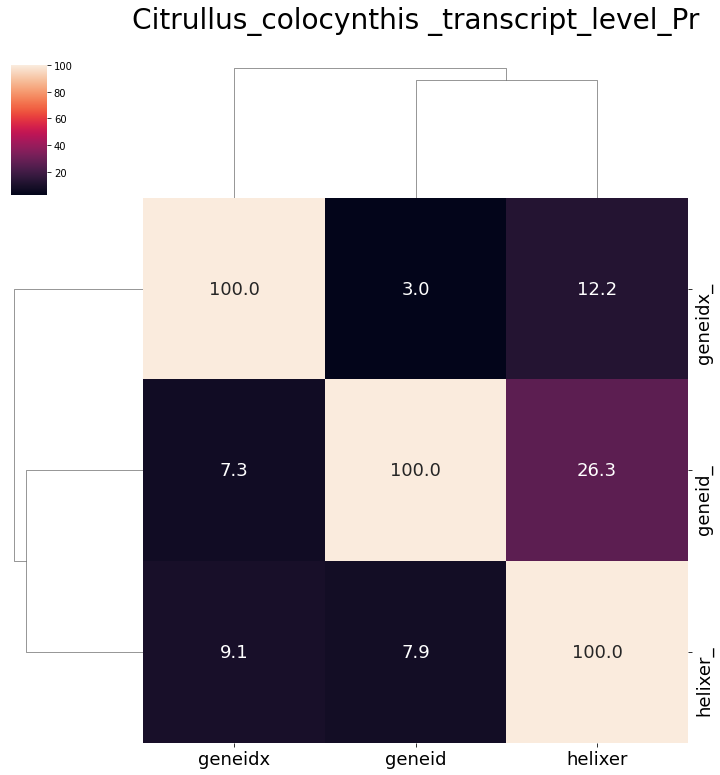

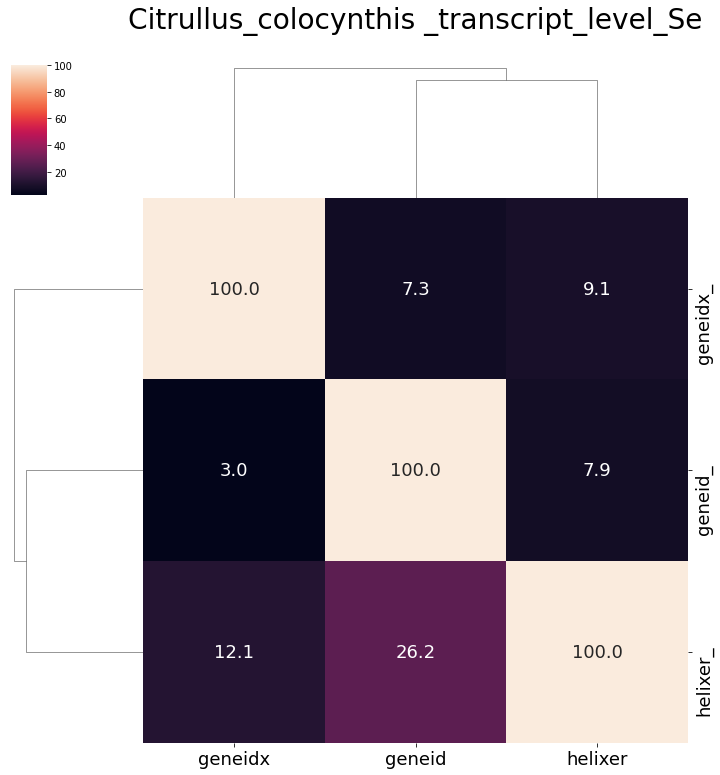

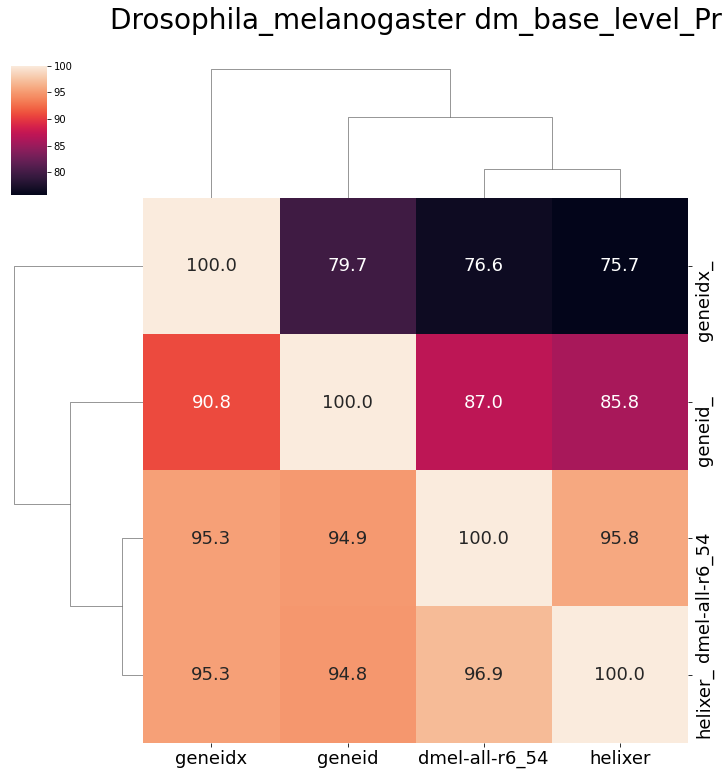

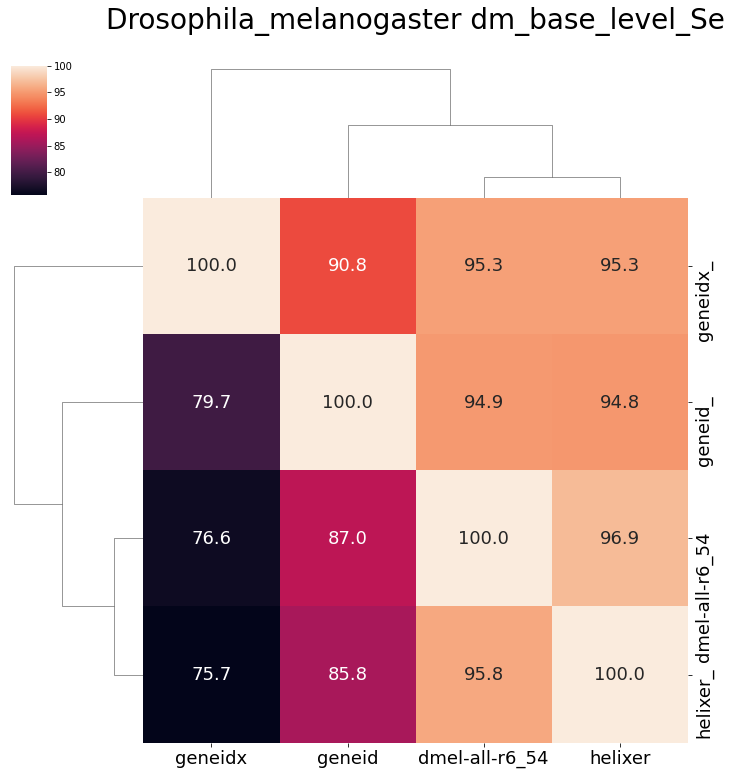

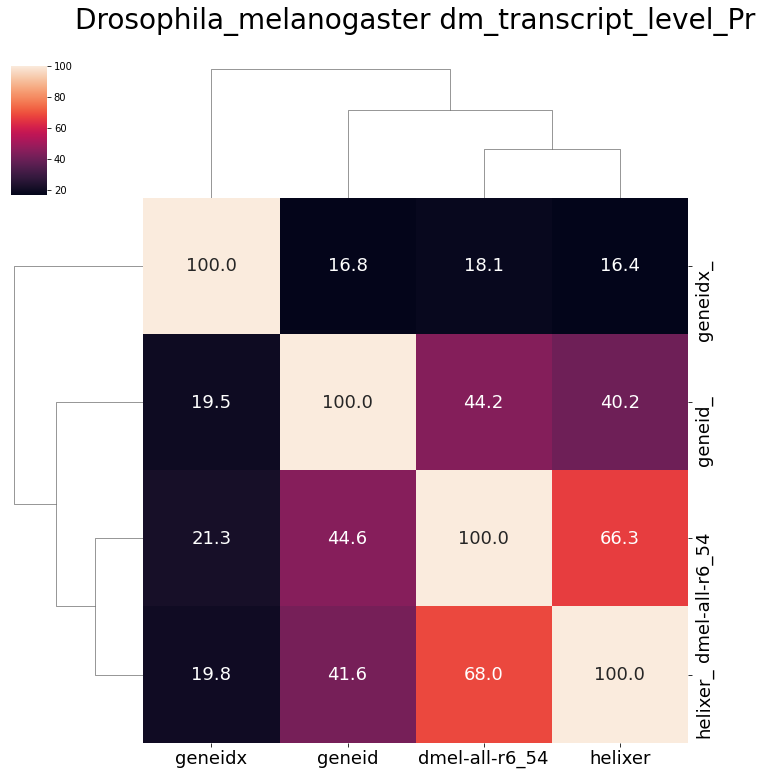

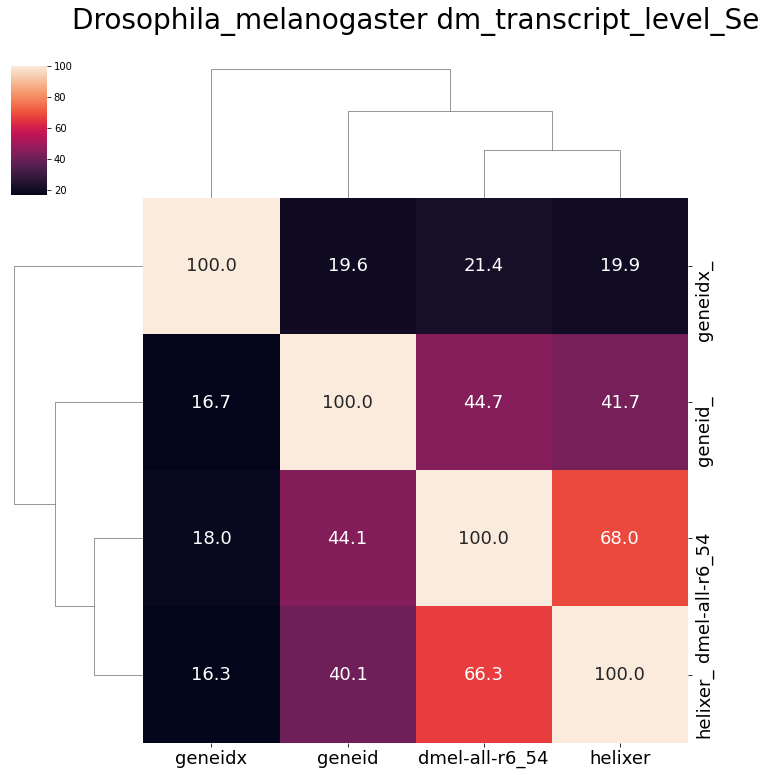

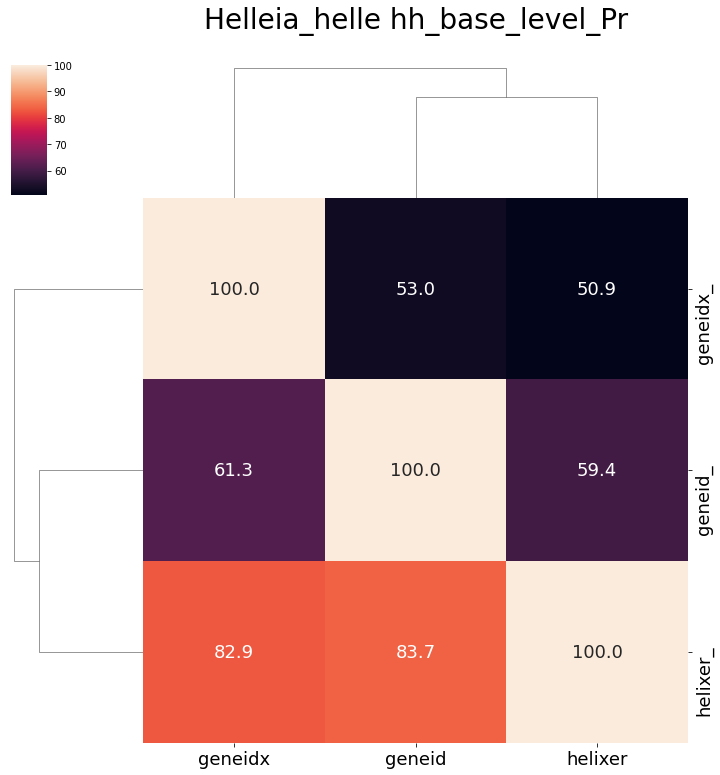

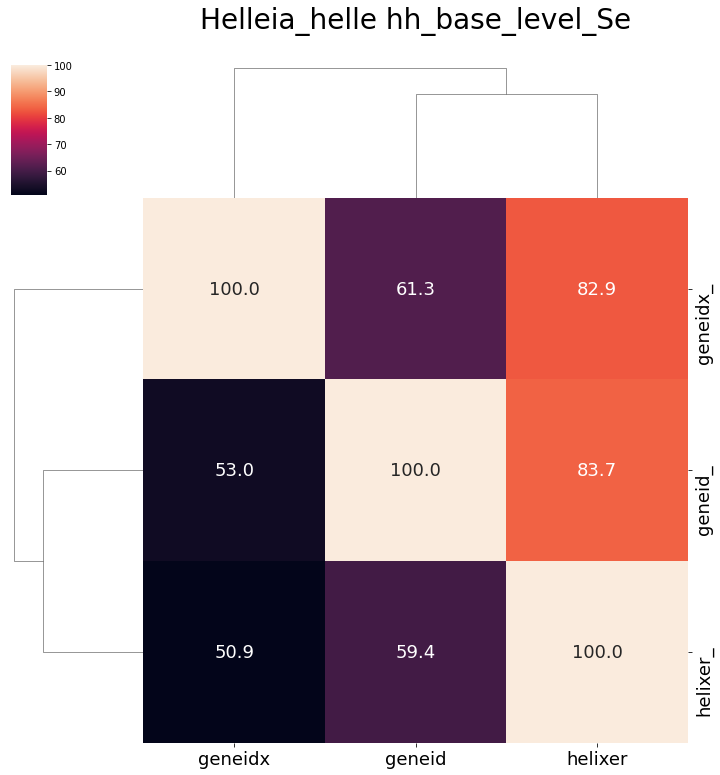

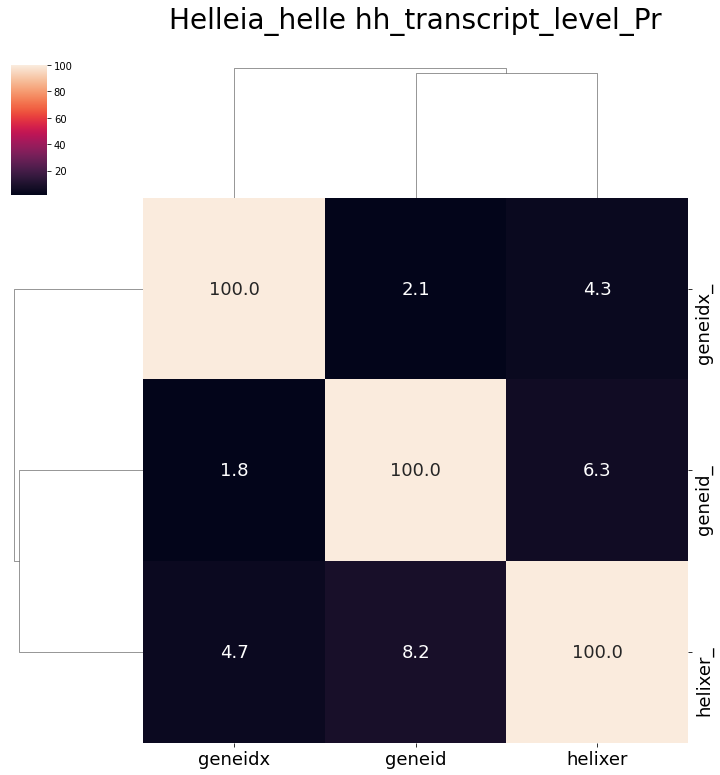

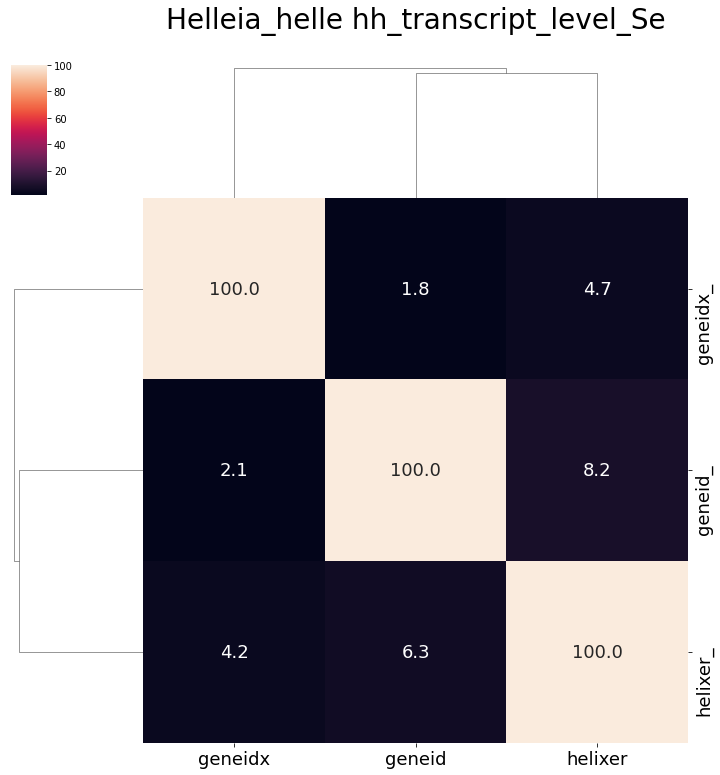

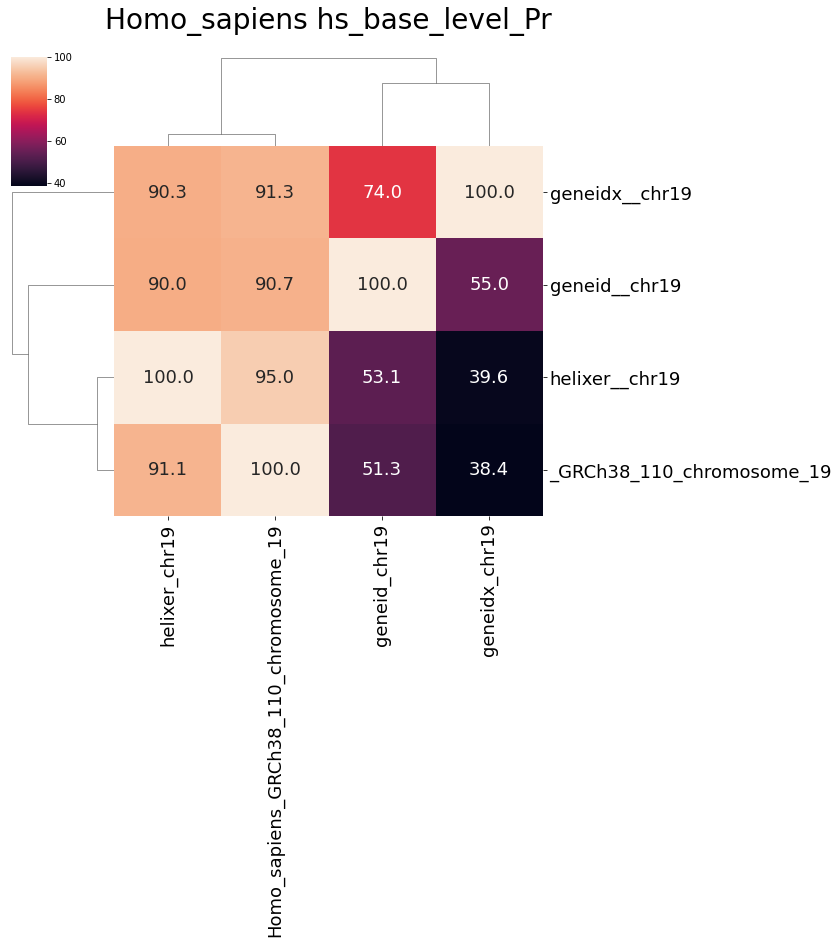

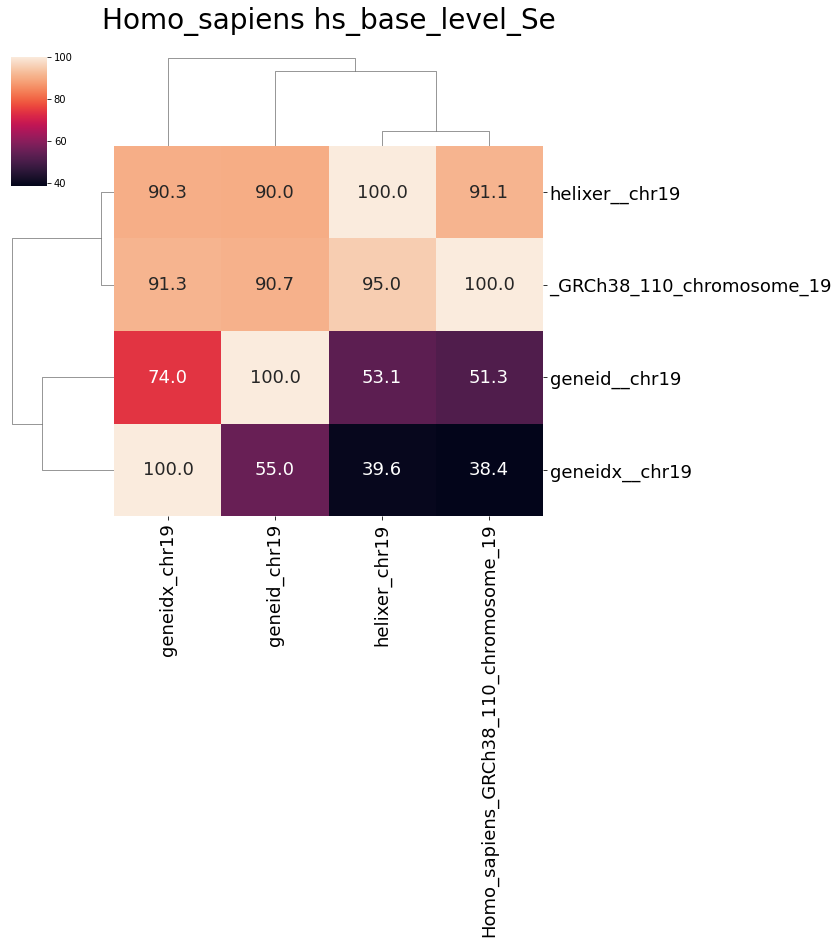

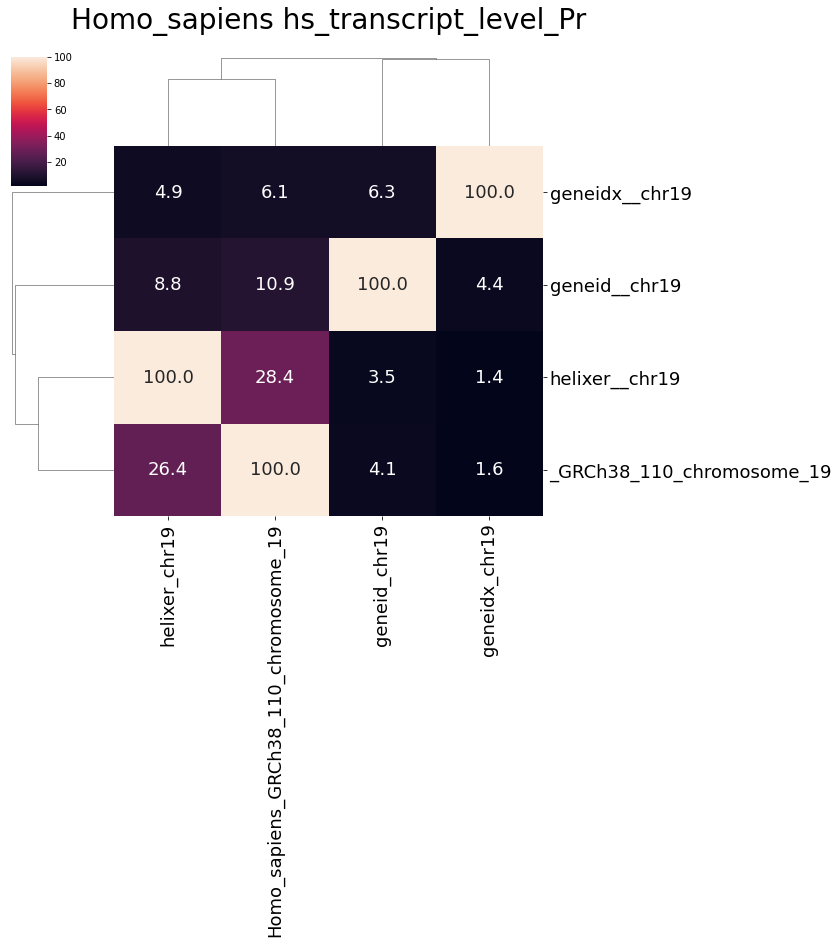

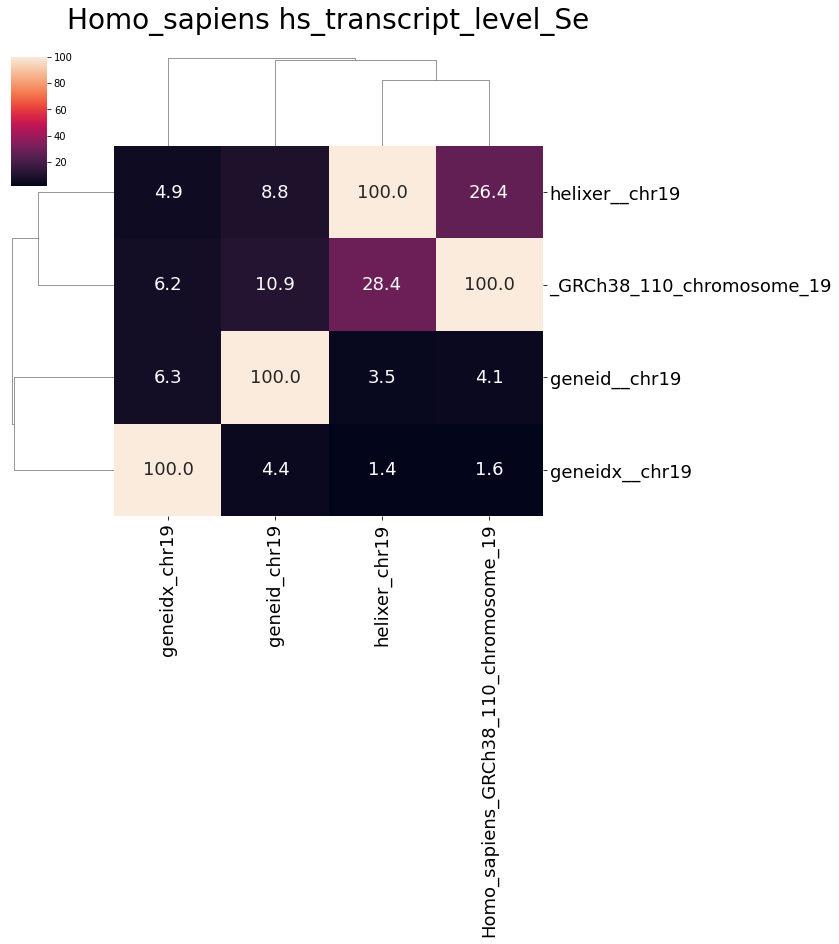

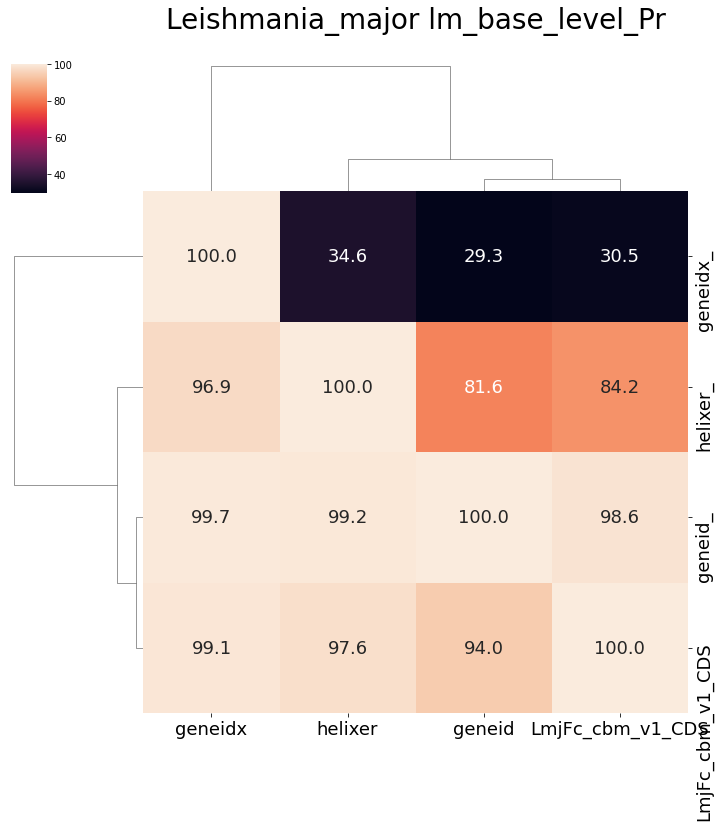

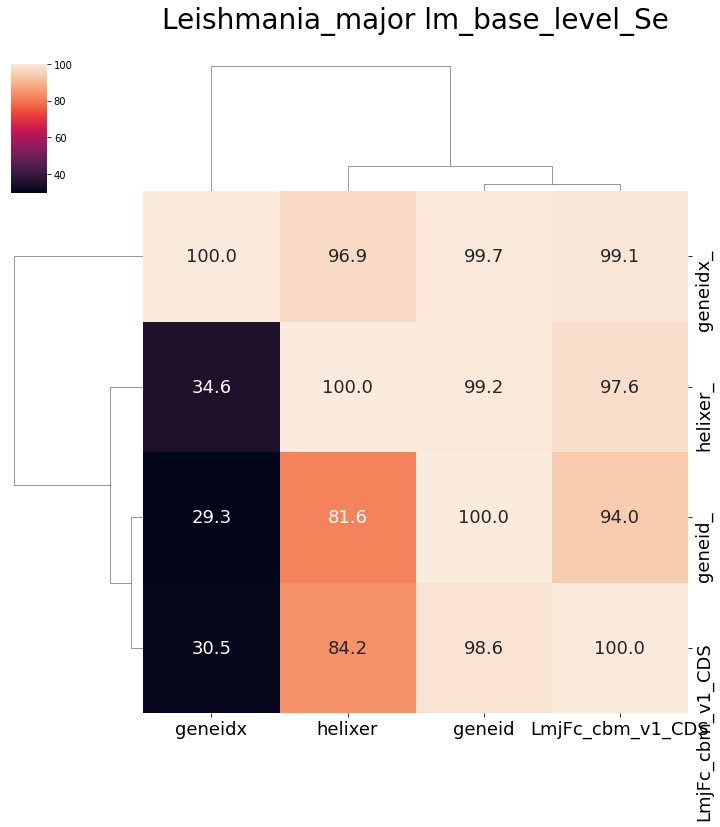

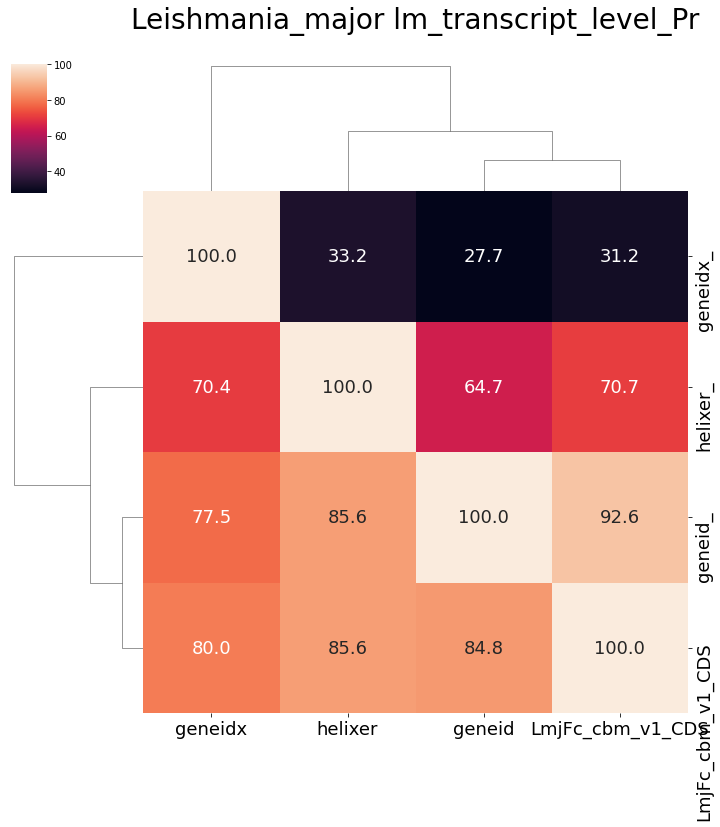

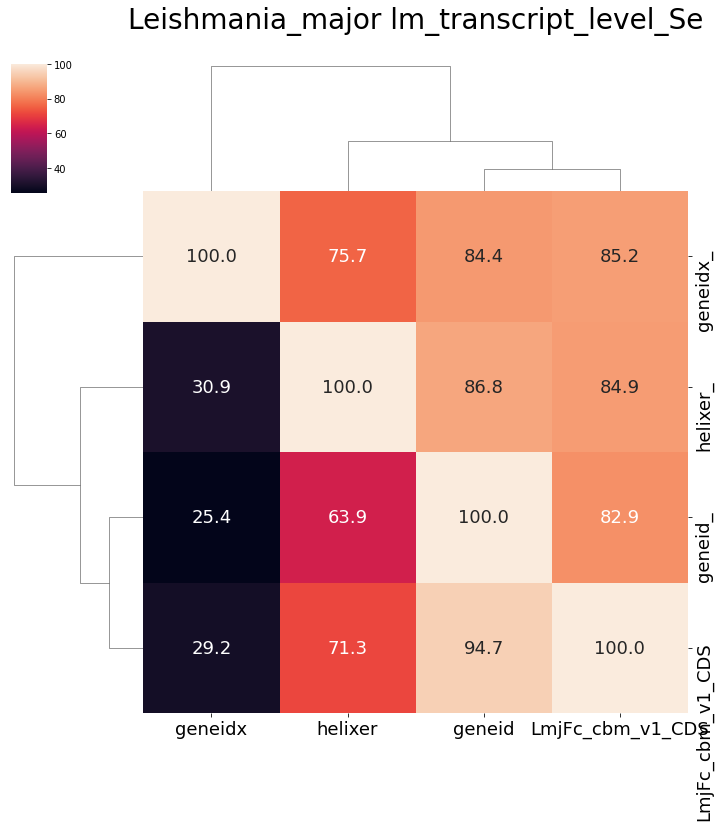

In [49]:
for s in a:
    species = s.split('/')[2]
    metric = s.split('/')[3].strip('.csv')
    df = pd.read_csv(s, index_col=0)
    full_name = species_dict[species]
    df.rename(columns=lambda col: remove_name(col, f'_{full_name}'),
          index=lambda col: remove_name(col, full_name), inplace=True)
    print_heatmap(df, f'{full_name} {metric}')

# BUSCO

In [56]:
b = ! ls ../out/*/*BUSCO_res.csv

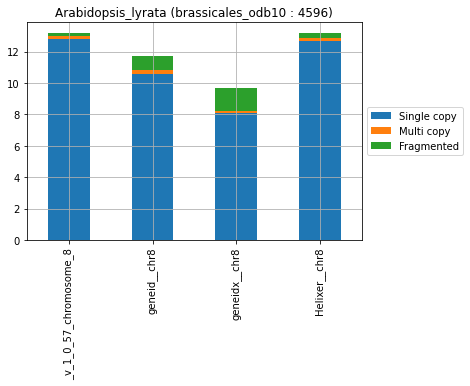

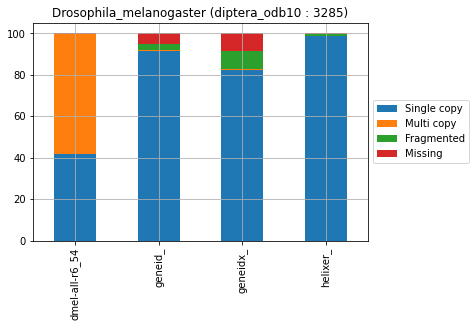

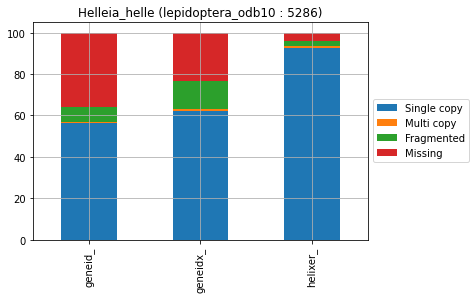

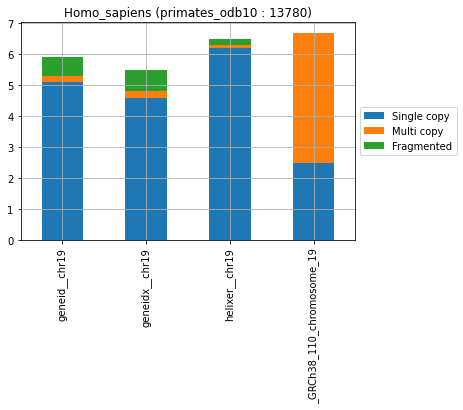

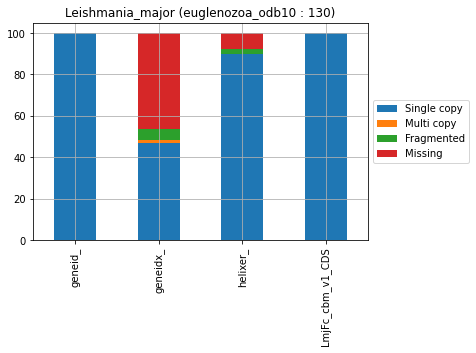

In [57]:
for s in b:
    species = s.split('/')[2]
    full_name = species_dict[species]

    df = pd.read_csv(s, index_col=0)
    df = df.transpose()
    df.rename(index=lambda col: remove_name(col, full_name), inplace=True)
    if species in ['al','hs']:
        metrics = ['Single copy','Multi copy','Fragmented']
    else:
        metrics = ['Single copy','Multi copy','Fragmented','Missing']
    tmp_df = df[metrics].astype(float)
    
    tmp_df.plot(kind='bar', stacked = 'True')
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'{full_name} ({df.name.unique()[0]} : {df.number_of_buscos.unique()[0]})')
